<a href="https://colab.research.google.com/github/JingwenLuo7/MLAILS-2025/blob/main/Project_01/ANNLinSig_MTBLS136.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align: justify; padding:5px; background-color:rgb(252, 253, 255); border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">
<img src="https://github.com/CIMCB/MetabComparisonBinaryML/blob/master/cimcb_logo.png?raw=true" width="180px" align="right" style="padding: 20px">

<h1> ANNLinSig_MTBLS136 </h1>

<br>
<br>
<br>
<p style="text-align: justify"> The study used in this tutorial has been previously published by  <a href="https://europepmc.org/abstract/MED/30830410">Stevens et al. (2018)</a>, and the deconvolved and annotated data file deposited at the Metabolights data repository. The data can be accessed directly via its study ID: <a href="https://www.ebi.ac.uk/metabolights/MTBLS136">MTBLS136</a>. This workflow requires data to be formatted as a Microsoft Excel file, using the Tidy Data framework (i.e. each column is a variable, and row is an observation). As such, the Excel file contains a Data Sheet and Peak Sheet. The Data Sheet contains all the metabolite concentrations and metadata associated with each observation (requiring the inclusion of the columns: Idx, SampleID, and Class). The Peak Sheet contains all the metadata pertaining to each measured metabolite (requiring the inclusion of the columns: Idx, Name, and Label). Please inspect the Excel file <a href="https://github.com/CIMCB/MetabComparisonBinaryML/blob/master/dynamic/data/MTBLS136.xlsx?raw=true">MTBLS136.xlsx</a> used in this workflow before proceeding.</p>

<p style="text-align: justify">This is a serum LC-MS dataset consisting of 949 named metabolites. The primary outcome for this paper was estrogen-only (E; n=332) vs. estrogen plus progestin (E+P; n=337) vs. non-users of post-menopausal hormone therapy regimes (Control; n=667). For the purpose of this study, we compare only the E vs. E+P in a binary discriminant analysis.</p>
<br>


</ol>
</div>

<div style="text-align: justify; padding:5px; background-color:rgb(252, 253, 255); border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">
    
<h1>ANN-LS Workflow </h1>
<br>
<p style="text-align: justify">This Jupyter Notebook implements the complete workflow for creating, optimising, and evaluating a 2 layer artificial neural network with Layer 1 consisting of multiple neurons (n = 2 to 6) with a linear activation function, and Layer 2 (output layer) consisting of a single neuron with a sigmoidal activation function (ANN-LS). <b style="text-align: justify"> ANN was implemented using <a href="https://keras.io">Keras</a> with a <a href="http://deeplearning.net/software/theano/">Theano backend.</a></b></p>
    

<b style="text-align: justify"> ANN uses the following Hyperparameter(s):</b>
<ul style="list-style-type: square;">
    <li><code>learning_rate</code>: the parameter that controls the step-size in updating the weights (default=0.01) </li>
    <li><code>n_neurons</code>: the number of neurons in the hidden layer (default=2)</li>
    <li><code>epochs</code>: the number of iterations in the model training (default=100) </li>
    <li><code>momentum</code>: a value that alters the learning rate schedule, whereby increasing the learning rate when the error cost gradient continue in the same direction (default=0.5)</li>
    <li><code>decay</code>: a value that alters the learning rate schedule, whereby decreasing the learning rate after each epoch/iteration (default=0)</li>
     <li><code>loss</code>: the function used to calculate the error of the model during the model training process known as backpropagation (default='binary_crossentropy')</li>
</ul>
<i style="text-align: justify">The purpose of each hyperparameter is explained here: <a href="http://neuralnetworksanddeeplearning.com/">Nielsen (2015)</a></i>

<br>
<br>

<p style="text-align: justify">Preliminary analysis indicated, for the metabolomics data sets used in this study, that varying hyperparameters <code>momentum</code> and <code>decay</code> had little impact on performance, thus they were kept constant at their default values. Additionally, it was observed that fixing the number of <code>epochs</code> to 400 proved effective across most of the data sets. Thus hyperparameter optimisation was reduced to a grid search across <code>n_neurons = [2,3,4,5,6]</code> and <code>learning_rate = [0.0001,0.001,0.01,0.1,1] </code>. After the number of neurons is chosen, the learning rate was fine-tuned as appropriate using a linear search.</p>

<br>

<b style="text-align: justify"> The notebook workflow is broken into the following steps:</b>

<ol>
    <li><b><i>Import Packages</i></b>: First, the Python packages required for this workflow need to be imported (<a href="http://www.numpy.org/"><code>numpy</code></a>, <a href="https://pandas.pydata.org/"><code>pandas</code></a>, and <a href="https://cimcb.github.io/cimcb"><code>cimcb</code></a>).
</li>
    <li><b><i>Load Data & Peak Sheet:</i></b> From the Excel spreadsheet, import the Data and Peak spreadsheets and create two respective <a href="https://pandas.pydata.org/">Pandas</a> tables: <code>DataTable</code> and <code>PeakTable</code>.</li>
    <li><b><i>Extract X & Y:</i></b> Next, we reduce the data in <code>DataTable</code> to include only those observations needed for the binary comparison and create a new table: <code>DataTable2</code>. We define one column of the data table to be the "outcome" variable <code>Outcomes</code>, and convert the class labels in this column to a binary outcome vector <code>Y</code>, where <code>1</code> is the positive outcome, and <code>0</code> the negative outcome (eg. case=1 & control=0). A new variable <code>peaklist</code> is created to hold the names (M1...Mn) of the metabolites to be used in the discriminant analysis. To create an independent dataset to evaluate, <a href="https://scikit-learn.org/stable/">scikit-learn</a> module's <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html"><code>train_test_split()</code></a> function is used. The data is split into 2/3rd training (<code>DataTrain</code> and <code>YTrain</code>), and 1/3rd test (<code>DataTest</code> and <code>YTest</code>). The metabolite data corresponding to <code>peaklist</code> is extracted from <code>DataTrain</code> and placed in a matrix <code>XTrain</code>. The <code>XTrain</code> matrix is log-transformed and auto-scaled, with missing values imputed using k-nearest neighbours (k=3). Then the metabolite data corresponding to <code>peaklist</code> is extracted from <code>DataTest</code> and placed in a matrix <code>XTest</code>. The <code>XTest</code> matrix is log-transformed and auto-scaled (using mu and sigma from <code>XTrain</code>), with missing values imputed using k-nearest neighbours (k=3).
    <li><b><i>Hyperparameter Optimisation:</i></b> Here, we use the helper function <code>cb.cross_val.KFold()</code> to carry out 5-fold cross-validation of a set of ANN models (ANN-LS) configured with different values for learning rate (0.001 to 1) and number of neurons (2 to 6). This helper function is generally applicable, and the values being passed to it are:
    <ul>
    <li>The class of model to be created by the function, <code>cb.model.NN_LinearSigmoid</code>.</li>
        <li>The metabolite matrix, <code>XTknn</code>, and binary outcome vector, <code>Y</code>.</li>
        <li>A dictionary, <code>param_dict</code>, describing key:value pairs where the key is a parameter that is passed to the model, and the value is a list of values to be passed to that parameter.</li>
        <li>The number of folds in the cross-validation, <code>folds</code>, and the number of monte carlo repetitions of the k-fold CV, <code>n_mc</code>.</li></ul>
When <code>cv.run()</code> followed by <code>cv.plot(metric='r2q2')</code> are run the predictive ability of the multiple models across the hyperparameter grid search (<code>n_neurons</code> vs. <code>learning_rate</code>) are displayed in the form of heatmaps representing the parametric performance values $R^2$, $Q^2$ and $|R^2 - Q^2|$. These heatmaps are interactively linked to a scatter plot of $|R^2 - Q^2|$ vs. $Q^2$ and line plots of $R^2$ & $Q^2$ vs <code>n_neurons</code> and <code>learning_rate</code>. If the function <code>cv.plot(metric='auc')</code> is run the predictive ability of the models is presented as measures of the area under the ROC curve, $AUC(full)$ & $AUC(cv)$, as a nonparametric alternative to $R^2$ & $Q^2$. These multiple plots are used to aid in selecting the optimal hyperparameter values.</li>
    <li><b><i>Build Model & Evaluate:</i></b> Here, we use the class <code>cb.model.NN_SigmoidSigmoid()</code> to building a ANN-SS model using the optimal hyperparameter values determined in step 4. The model is trained on the training dataset, <code>XTrainKnn</code>, and tested on the independent test dataset, <code>XTestKnn</code>. Next, the trained model's <code>.evaluate()</code> method is used to visualise model performance for both the training and independent test dataset using: a <a href="https://www.data-to-viz.com/graph/violin.html">violin plot</a> showing the distributions of negative and positive responses as violin and box-whisker plots; a <a href="https://books.google.com.au/books?id=7WBMrZ9umRYC">probability density function</a> plot for each response type, and a <a href="https://doi.org/10.1007/s11306-012-0482-9">ROC curve</a> that displays the curve for the training dataset (green) and test dataset (yellow).
   <li><b><i>Bootstrap Evaluation:</i></b> Finally, to create an estimate of the robustness and a measure of generalised predictive ability of this model we perform  <a href="https://link.springer.com/article/10.1007%2FBF00058655">bootstrap aggregation</a> (Bagging) using the helper function <code>cb.bootstrap.Per()</code> with 100 boostrapped models. This generates a population of 100 model predictions for both the training set (in-bag prediction - IB) and the holdout test set (out-of-bag - OOB) from the full dataset, with the metabolite matrix, <code>XBootKnn</code>, and binary outcome vector, <code>Y</code>. These predictions are visualised with a box-violin and probability density function plot for the aggregate model. The ROC curve displays the curve for the training dataset (green) and test dataset (yellow) from section 5 with 95% confidence intervals (light green band = IB & light yellow band = OOB).
  <li><b><i>Export Results:</i></b> Exporting the model evaluation results as an Excel spreadsheet.</li>
</ol>

</div>

### 1. Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import (
    r2_score,
    accuracy_score,roc_auc_score,
    classification_report,
    roc_curve,auc
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD

print('All packages successfully loaded')

All packages successfully loaded


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. Load Data & Peak Sheet

In [3]:
#home = 'data/'
home = '/content/drive/MyDrive/'
file = 'MTBLS136.xlsx'

#DataTable,PeakTable = cb.utils.load_dataXL(home + file, DataSheet='Data', PeakSheet='Peak')
DataTable = pd.read_excel(home + file, sheet_name='Data')
PeakTable = pd.read_excel(home + file, sheet_name='Peak')

### 3. Extract X & Y

In [4]:
# Clean PeakTable and Extract PeakList
PercMiss = PeakTable['Perc_missing']
PeakTableClean = PeakTable[(PercMiss < 20)]
PeakList = PeakTableClean['Name']

# Select Subset of Data
DataTable2 = DataTable[(DataTable.Class == 1) | (DataTable.Class == 0)]

# Create a Binary Y Vector
Outcomes = DataTable2['Class']
Y = Outcomes.values

# Split Data into Train (2/3) and Test (1/3)
DataTrain, DataTest, YTrain, YTest = train_test_split(DataTable2, Y, test_size=1/3, stratify=Y, random_state=85)

# Extract Train Data
XTrain = DataTrain[PeakList]
XTrainLog = np.log(XTrain)

# Calculate mu and sigma from Train Data
mu = np.nanmean(XTrainLog, axis=0)  # Calculate mean of each column, ignoring NaNs
sigma = np.nanstd(XTrainLog, axis=0) # Calculate standard deviation of each column, ignoring NaNs

# Fill missing values in Test Data using mu and sigma from Train Data
XTest = DataTest[PeakList]
XTestLog = np.log(XTest)
XTestLog = XTestLog.fillna(pd.DataFrame(mu).T)  # Fill NaNs with mu
# XTestLog = XTestLog.fillna(pd.DataFrame(mu).T)  # Fill NaNs with sigma - This would not be usually done


# Scale Train Data
scaler = StandardScaler()
XTrainScale = scaler.fit_transform(XTrainLog)

# Impute Train Data
imputer = KNNImputer(n_neighbors=3)  # k=3
XTrainKnn = imputer.fit_transform(XTrainScale)


# Scale Test Data (using mu and sigma from Train Data)
XTestScale = scaler.transform(XTestLog)  # Use the same scaler fitted on training data

# Impute Test Data
XTestKnn = imputer.transform(XTestScale)  # Use the same imputer fitted on training data



### 4. Hyperparameter Optimisation

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.0649   
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9872  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0553  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1310  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8322  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1340  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2864  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9208  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.8681  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.9868  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8353  
3/3

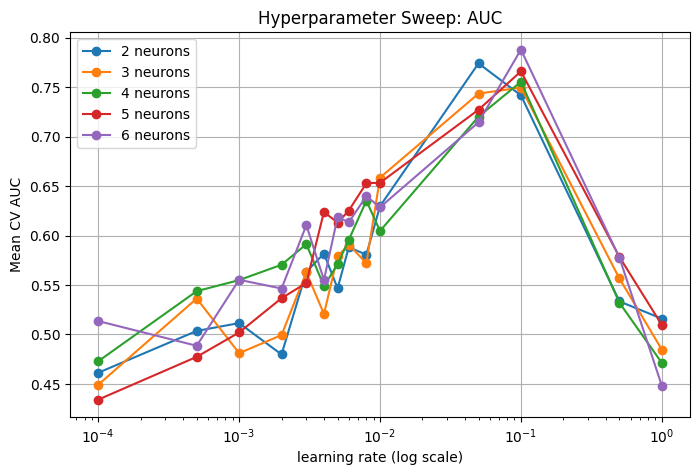

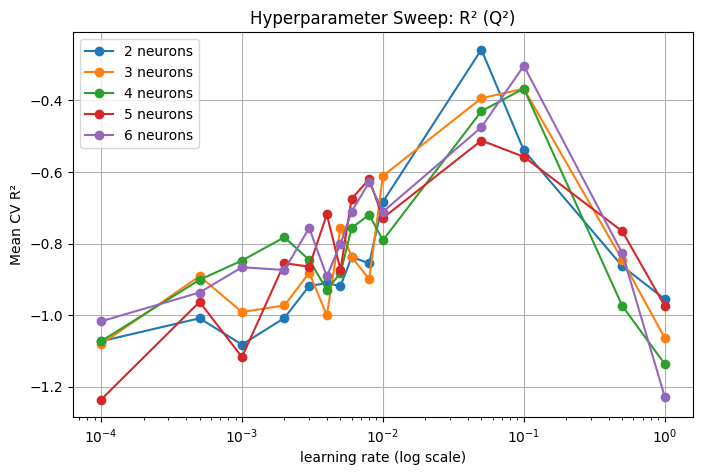

In [13]:
# params values
learning_rates = [0.0001,0.0005,0.001,0.002,0.003,0.004,0.005,0.006,0.008,0.01,0.05,0.1,0.5,1.0] # Changed 1 to 1.0
neurons_list = [2, 3, 4, 5, 6]
n_folds = 5
n_epochs  = 400
momentum  = 0.5

results = []

kf = KFold(n_splits=n_folds, shuffle=True, random_state=85)

for lr in learning_rates:
    for n_neurons in neurons_list:
        aucs = []
        r2s  = []
        for train_idx, test_idx in kf.split(XTrainKnn):
            X_tr, X_val = XTrainKnn[train_idx], XTrainKnn[test_idx]
            y_tr, y_val = YTrain[train_idx], YTrain[test_idx]


            model = Sequential([
                Input(shape=(XTrainKnn.shape[1],)),
                Dense(n_neurons, activation=None),
                Dense(1, activation='sigmoid')
                ])

            # Compile the model before fitting
            optimizer = SGD(learning_rate=lr, momentum=momentum)
            model.compile(optimizer=optimizer, loss='binary_crossentropy')

            model.fit(X_tr, y_tr)

            # 预测 & 计算指标
            prob = model.predict(X_val).ravel() #  .ravel() flattens the output to a 1D array
            pred = (prob >= 0.7).astype(int) # predictions are based on a threshold of 0.7

            aucs.append(roc_auc_score(y_val, prob))
            r2s .append(r2_score(y_val, pred))

        results.append({
            'lr': lr,
            'neurons': n_neurons,
            'mean_auc': np.mean(aucs),
            'mean_r2':  np.mean(r2s)
        })

df = pd.DataFrame(results)

# plot: Learning Rate vs AUC
plt.figure(figsize=(8,5))
for n in neurons_list:
    sub = df[df['neurons']==n]
    plt.plot(sub['lr'], sub['mean_auc'], marker='o', label=f'{n} neurons')
plt.xscale('log')
plt.xlabel('learning rate (log scale)')
plt.ylabel('Mean CV AUC')
plt.title('Hyperparameter Sweep: AUC')
plt.legend()
plt.grid(True)
plt.show()

# plot R²(Q²)
plt.figure(figsize=(8,5))
for n in neurons_list:
    sub = df[df['neurons']==n]
    plt.plot(sub['lr'], sub['mean_r2'], marker='o', label=f'{n} neurons')
plt.xscale('log')
plt.xlabel('learning rate (log scale)')
plt.ylabel('Mean CV R²')
plt.title('Hyperparameter Sweep: R² (Q²)')
plt.legend()
plt.grid(True)
plt.show()

### 5. Build Model & Evaluate

In [6]:
def evaluate_train_test(y_train, y_train_prob, y_train_pred,
                        y_test, y_test_prob, y_test_pred):
    from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix, roc_curve
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Train/Test Metrics
    print("=== Train Evaluation ===")
    print("AUC:", roc_auc_score(y_train, y_train_prob))
    print("Accuracy:", accuracy_score(y_train, y_train_pred))
    print("Classification Report:\n", classification_report(y_train, y_train_pred))

    # Calculate Sensitivity and Specificity for Train
    tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
    sensitivity_train = tp / (tp + fn)  # Recall
    specificity_train = tn / (tn + fp)
    print(f"Sensitivity (Recall): {sensitivity_train:.3f}")
    print(f"Specificity: {specificity_train:.3f}")

    print("\n=== Test Evaluation ===")
    print("AUC:", roc_auc_score(y_test, y_test_prob))
    print("Accuracy:", accuracy_score(y_test, y_test_pred))
    print("Classification Report:\n", classification_report(y_test, y_test_pred))

    # Calculate Sensitivity and Specificity for Test
    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
    sensitivity_test = tp / (tp + fn)  # Recall
    specificity_test = tn / (tn + fp)
    print(f"Sensitivity (Recall): {sensitivity_test:.3f}")
    print(f"Specificity: {specificity_test:.3f}")

    # Confusion Metrics
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    cm_train = confusion_matrix(y_train, y_train_pred)
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axs[0])
    axs[0].set_title('Train Confusion Matrix')
    axs[0].set_xlabel('Predicted')
    axs[0].set_ylabel('True')

    cm_test = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', ax=axs[1])
    axs[1].set_title('Test Confusion Matrix')
    axs[1].set_xlabel('Predicted')
    axs[1].set_ylabel('True')

    plt.tight_layout()
    plt.show()

    # ROC Curve
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr_train, tpr_train, label=f'Train ROC (AUC = {roc_auc_score(y_train, y_train_prob):.3f})')
    plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {roc_auc_score(y_test, y_test_prob):.3f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def plot_training_loss(history):
    plt.figure(figsize=(6, 4))
    plt.plot(history.history['loss'], label='Training Loss', color='orange')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
=== Train Evaluation ===
AUC: 1.0
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       221
         1.0       1.00      1.00      1.00       224

    accuracy                           1.00       445
   macro avg       1.00      1.00      1.00       445
weighted avg       1.00      1.00      1.00       445

Sensitivity (Recall): 1.000
Specificity: 1.000

=== Test Evaluation ===
AUC: 0.7812550281576831
Accuracy: 0.7354260089686099
Classification Report:
               precision    recall  f1-score   support

         0.0       0.73      0.73      0.73       110
         1.0       0.74      0.74      0.74       113

    accuracy                           0.74       223
   macro avg       0.74      0.74      0.74       223
weighted avg       0.74      0.74      0.74       223

Sensitivity (Recall): 0.743
Specificity: 0.727


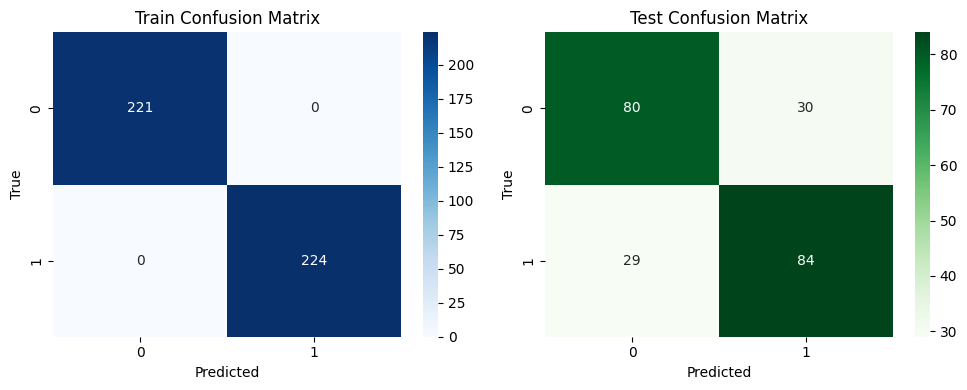

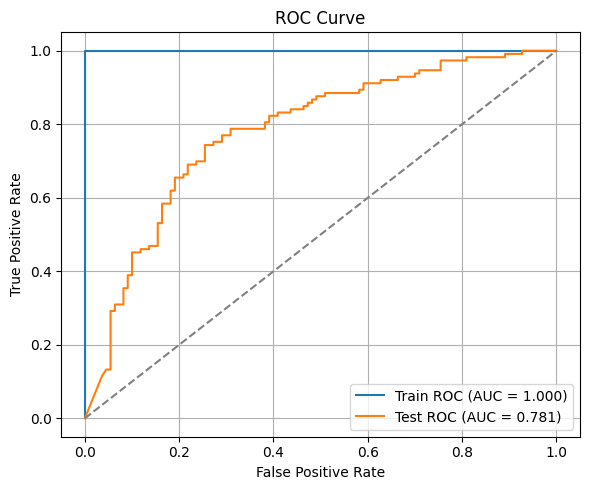

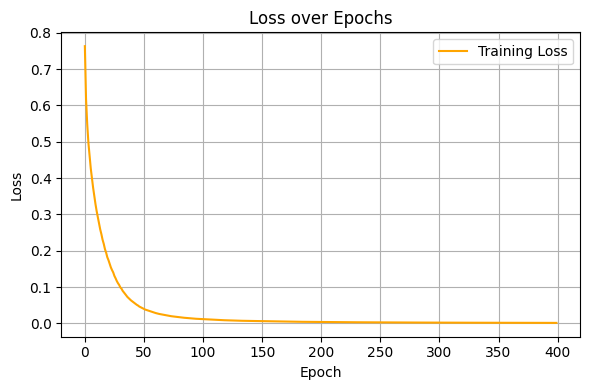

In [14]:
best_n_neurons = 5
best_learning_rate = 0.01

# 1. construct ANN-SigSig
model = Sequential([
    Input(shape=(XTrainKnn.shape[1],)),
    Dense(best_n_neurons, activation=None),
    Dense(1, activation='sigmoid')
])
optimizer = SGD(learning_rate=best_learning_rate, momentum=0.5)
model.compile(optimizer=optimizer, loss='binary_crossentropy')

# 2. Training model

history = model.fit(XTrainKnn, YTrain, epochs=400, verbose=0)


# 3. Prediction
YPredTrainProb = model.predict(XTrainKnn).ravel()
YPredTestProb = model.predict(XTestKnn).ravel()
## Label
YPredTrain = (YPredTrainProb >= 0.7).astype(int)
YPredTest = (YPredTestProb >= 0.7).astype(int)


# 4. Evaluation
evaluate_train_test(YTrain, YPredTrainProb, YPredTrain,
           YTest, YPredTestProb, YPredTest)

plot_training_loss(history)
